- Assignment – High Frequency Words
  
  Please answer the following questions in an IPython Notebook, posted to GitHub.

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
   defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”


In [63]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stanza as stz
from nltk.corpus import stopwords
from nltk.book import text1  # Moby Dick by Herman Melville
import string
import re
from collections import Counter

In [64]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [65]:
from nltk.book import *

I create a dispersion plot for moby dick which I have never read, but I have heard refrenced and have an idea of the theme and plot so i look for thematic words such as good and evil, as well a god and devil.


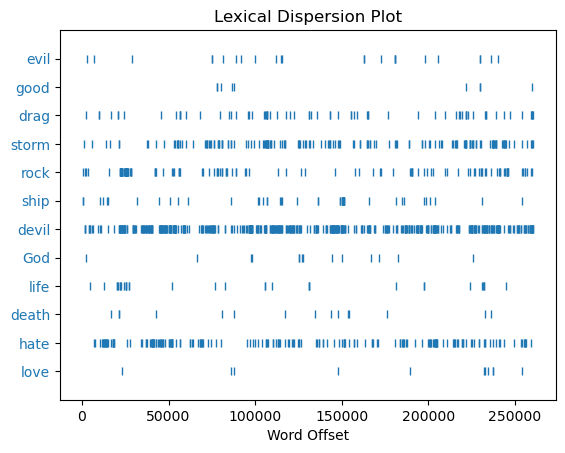

In [66]:
text1.dispersion_plot(
    [
        "love",
        "hate",
        "death",
        "life",
        "God",
        "devil",
        "ship",
        "rock",
        "storm",
        "drag",
        "good",
        "evil",
    ]
)

Then length in tokens of Moby dick.
Then the vocabulary (the unique tokens.)


In [67]:
print(f"Total  tokens: {len(text1)}")
print(f"Unique  words: {len(set(text1))}")

Total  tokens: 260819
Unique  words: 19317


Now lets look at a frequency distribution


In [68]:
moby_dick_fq = FreqDist(text1)
print(moby_dick_fq)

<FreqDist with 19317 samples and 260819 outcomes>


In [69]:
moby_dick_fq.most_common(200)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624),
 ('The', 612),
 ('their', 612),
 ('are', 586),
 ('they', 586),
 ('an', 582),
 ('some', 578),
 ('then', 571),
 ('my', 564),
 ('when', 553),
 ('upon', 538),
 ('out', 529),
 ('into', 520),
 ('man', 508),
 ('ship', 507),
 ('up', 505),
 ('mor

We can see that by defualt we are looking at the most common tokens and not necerrily the most wommon unique words. We can improve this by defining the what we consider to be words. Lets apply stop words, and filter simple token for punctuation.


In [70]:
stop_words = set(stopwords.words("english"))


# Clean and filter tokens
clean_tokens = [
    w.lower()
    for w in text1
    if re.match("^[a-zA-Z]+$", w)  # only alphabetic
    and w.lower() not in stop_words  # remove stopwords
    and len(w) > 2  # remove short tokens like 's', 'mr', etc.
]

In [71]:
moby_dick_cw = Counter(clean_tokens)
print(moby_dick_cw.most_common(200))
print(f"Total filtered tokens: {len(clean_tokens)}")
print(f"Unique filtered words: {len(set(clean_tokens))}")

[('whale', 1226), ('one', 921), ('like', 647), ('upon', 566), ('man', 527), ('ship', 518), ('ahab', 511), ('sea', 455), ('old', 450), ('would', 432), ('though', 384), ('head', 345), ('yet', 345), ('boat', 336), ('time', 334), ('long', 333), ('captain', 329), ('still', 312), ('great', 306), ('said', 304), ('two', 298), ('must', 283), ('seemed', 283), ('white', 281), ('last', 277), ('see', 272), ('thou', 271), ('way', 271), ('whales', 268), ('stubb', 257), ('queequeg', 252), ('little', 249), ('round', 247), ('three', 245), ('say', 244), ('men', 244), ('sperm', 244), ('may', 240), ('first', 235), ('every', 232), ('well', 230), ('much', 223), ('could', 216), ('good', 216), ('hand', 214), ('side', 208), ('ever', 206), ('never', 206), ('look', 205), ('starbuck', 198), ('deck', 196), ('almost', 195), ('even', 191), ('water', 190), ('thing', 188), ('might', 183), ('away', 183), ('come', 179), ('made', 178), ('world', 176), ('day', 176), ('sir', 175), ('life', 174), ('chapter', 173), ('pequod',

This looks much better with common stop words and punction tokens removed, lets plot this table.


In [72]:
moby_dick200 = moby_dick_cw.most_common(200)

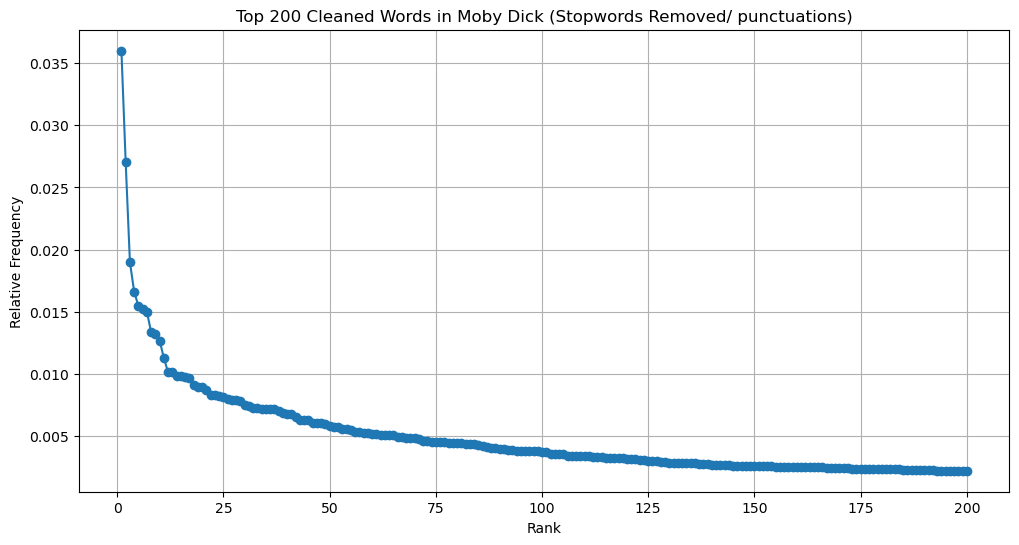

In [73]:
words, counts = zip(*moby_dick200)
cw_rf = [c / sum(counts) for c in counts]
plt.figure(figsize=(12, 6))
plt.plot(range(1, 201), cw_rf, marker="o")
plt.title("Top 200 Cleaned Words in Moby Dick (Stopwords Removed/ punctuations)")
plt.xlabel("Rank")
plt.ylabel("Relative Frequency")
plt.grid(True)
plt.show()

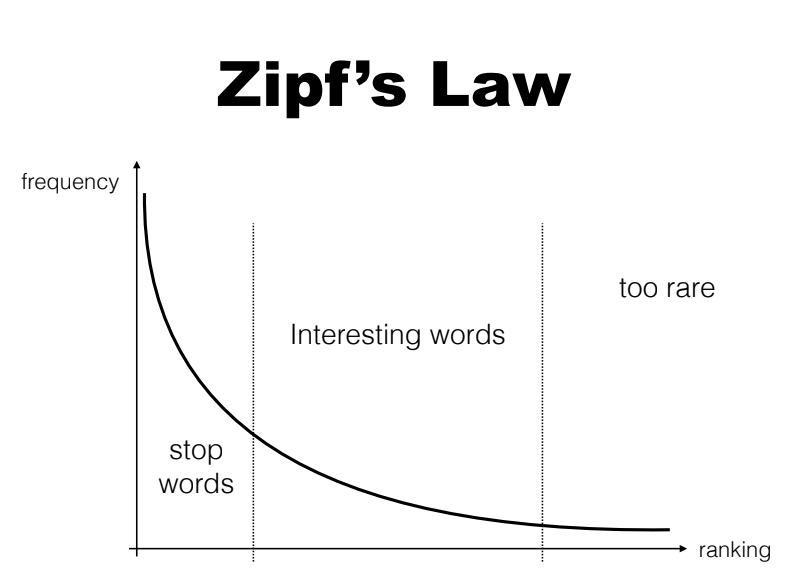


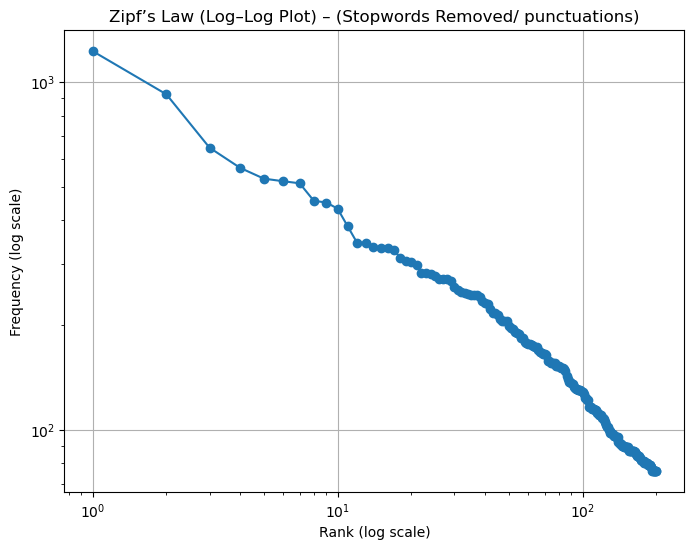

In [74]:
ranks = np.arange(1, len(moby_dick200) + 1)
freqs = np.array([f for _, f in moby_dick200])

plt.figure(figsize=(8, 6))
plt.loglog(ranks, freqs, marker="o")
plt.title("Zipf’s Law (Log–Log Plot) – (Stopwords Removed/ punctuations)")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

In [75]:
from nltk.corpus import gutenberg
import re

# Combine all Gutenberg files
all_words = []
for fileid in gutenberg.fileids():
    all_words.extend(gutenberg.words(fileid))

# Clean and extract vocabulary
vocab = sorted(set(w.lower() for w in all_words if re.match("^[a-zA-Z]+$", w)))

In [76]:
print("Total vocabulary size across Gutenberg:", len(vocab))
print(f"Unique  words: {len(set(text1))}")
a = len(vocab)
b = len(set(text1))
print(
    f"unique words in Moby Dick: / unique words in Gutenberg files \n{b} / {a} = {round((b/a),4)} "
)

Total vocabulary size across Gutenberg: 41481
Unique  words: 19317
unique words in Moby Dick: / unique words in Gutenberg files 
19317 / 41481 = 0.4657 


Moby Dick clearly obeys Zipf’s Law, as its word frequency decays roughly in proportion to 1/rank, even after stopwords are removed. This pattern confirms that the text follows the same statistical regularities observed across natural language.

However, compared to universal corpora, its vocabulary is less diverse but more thematically concentrated, which is expected. The language reflects not only a specific historical stage in the evolution of English, but also Melville’s individual diction, a singular literary genre, and a focused thematic domain centered on seafaring and existential exploration.
